# 18.Proje-Arabic_Letters_Classification
# Arap Alfabesi Görüntülerini Sınıflandırma

In [1]:
pip install --upgrade numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/64/41/284783f1014685201e447ea976e85fed0e351f5debbaf3ee6d7645521f1d/numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 928.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, b

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/9273.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/9292.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/4353.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/7968.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/6490.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/5511.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/6262.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/2664.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/8

In [3]:
def nameToLabel(name):
    return "_".join(name.replace('.', '_').split('_')[1:3])

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(title)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [65]:
def load_data(base_folder, target_size):
    images = []
    labels = []

    for category in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category)

        if os.path.isdir(category_path):  # Klasör mü kontrol et
            for picture_name in sorted(os.listdir(category_path)):
                img_path = os.path.join(category_path, picture_name)

                if os.path.isfile(img_path):  # Sadece dosyaları işleyin, klasörleri atlayın
                    img = image.load_img(img_path, target_size=target_size)
                    img_array = image.img_to_array(img)

                    images.append(img_array)

                    # Etiketleme işlemi için nameToLabel fonksiyonu kullanılıyor
                    label = nameToLabel(picture_name)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

YOUR_TARGET_SIZE = (100, 100)  # Örnek bir hedef boyut
test_base_folder = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/"
train_base_folder = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/"

# Test veri setini yükle ve yeniden boyutlandır
test_images, test_labels = load_data(test_base_folder, YOUR_TARGET_SIZE)
test_images_resized = np.expand_dims(test_images, axis=-1)

# Eğitim veri setini yükle
train_images, train_labels = load_data(train_base_folder, YOUR_TARGET_SIZE)

# Her iki veri setini de kontrol et
print("\nEğitim veri seti boyutu:", train_images.shape)
print("Eğitim etiketleri boyutu:", train_labels.shape)

# Test seti boyutlarını kontrol et ve mesaj yazdır
print("\nTest veri seti boyutu:", test_images_resized.shape)
print("Test etiketleri boyutu:", test_labels.shape)

if len(test_images) > 0:
    # Eğer test seti boş değilse, örnek bir resmi görüntüle
    print("\nÖrnek test resmi adı ve etiketi:")
    first_test_image_name = sorted(os.listdir(test_base_folder))[0]
    print("Test resmi adı:", first_test_image_name)
    print("Test resmi etiketi:", nameToLabel(first_test_image_name))
else:
    print("\nTest seti boş.")


Eğitim veri seti boyutu: (42559, 100, 100, 3)
Eğitim etiketleri boyutu: (42559,)

Test veri seti boyutu: (0, 1)
Test etiketleri boyutu: (0,)

Test seti boş.


In [12]:
import cv2

(100, 100, 3)


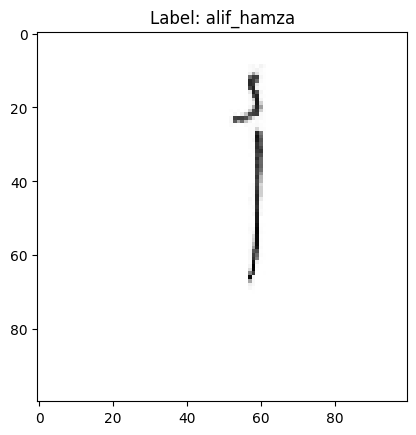

In [13]:
# Eğitim verisinin şeklini kontrol et
print(train_images[0].shape)

# Eğer renkli ise, bu durumu gri tonluya dönüştür
if len(train_images[0].shape) == 3:
    # Renkli görüntüyü gri tonluya dönüştür
    gray_image = cv2.cvtColor(train_images[0], cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f"Label: {train_labels[0]}")
    plt.show()

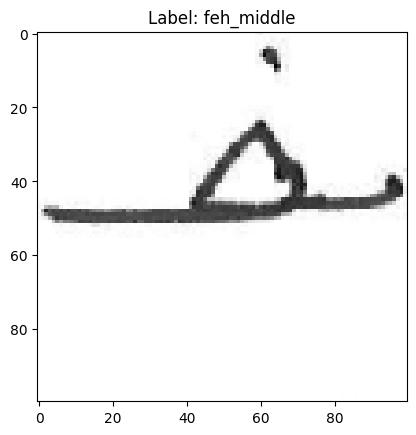

In [20]:
plt.imshow(cv2.cvtColor(train_images[1888], cv2.COLOR_BGR2GRAY) if len(train_images[0].shape) == 3 else train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[1888]}")
plt.show()

In [15]:
print(train_images[0].shape)
print(train_images[0].dtype)

(100, 100, 3)
float32


In [16]:
print(np.min(train_images[0]), np.max(train_images[0]))

27.0 255.0


In [66]:
import random

In [67]:
liste=[]
for i in range(11):
    liste.append(random.randint(1,42559))

In [68]:
liste #rastgele on rakam

[22647, 33010, 12987, 24064, 36948, 38264, 40440, 20137, 27866, 16449, 13246]

In [2]:
#Normalize / Standardize:
train_images=train_images/255.0
test_images=test_images/255.0

NameError: name 'train_images' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer, Reshape

import cv2

resized_images = [cv2.resize(img, (28, 28)) for img in train_images]
gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in resized_images]
train_images_resized = np.array(gray_images).reshape(-1, 28, 28, 1)

In [ ]:
#CNN- Resim tanıma modeli
model=Sequential()
model.add(InputLayer(input_shape=(100,100,3))) # dizinin boyutunu vermemiz gerek
model.add(Reshape(target_shape=(100,100,3))) #resmi yeniden şekillendirme
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu')) #CNN
model.add(MaxPooling2D(pool_size=(2,2))) #MaxpoolingCNN
model.add(Flatten())
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [33]:
model.fit(train_images,train_labels, validation_split=0.10, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 100, 100, 3)


In [ ]:
loss, accuracy=model.evaluate(test_images,test_labels)

In [29]:
model.fit(train_images,train_labels,epochs=10)

KeyboardInterrupt: 

In [ ]:
_,accuracy=model.evaluate(test_images,test_labels)

In [ ]:
accuracy*100

In [35]:
!pip install --upgrade numpy scipy

In [37]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Reshape, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image

def load_data(base_folder, target_size):
    images = []
    labels = []

    for category in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category)

        if os.path.isdir(category_path):  # Klasör mü kontrol et
            for picture_name in sorted(os.listdir(category_path)):
                img_path = os.path.join(category_path, picture_name)

                if os.path.isfile(img_path):  # Sadece dosyaları işleyin, klasörleri atlayın
                    img = image.load_img(img_path, target_size=target_size)
                    img_array = image.img_to_array(img)

                    images.append(img_array)

                    # Etiketleme işlemi için nameToLabel fonksiyonu kullanılıyor
                    label = int(category)  # Klasör adını etiket olarak kullan
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

def create_model(input_shape):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(Reshape(target_shape=input_shape))
    model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer='adam',
        metrics='accuracy'
    )
    return model

YOUR_TARGET_SIZE = (28, 28)  # Yeni hedef boyut
test_base_folder = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/"
train_base_folder = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/"

# Test veri setini yükle ve yeniden boyutlandır
test_images, test_labels = load_data(test_base_folder, YOUR_TARGET_SIZE)
test_images_resized = np.expand_dims(test_images, axis=-1)

# Eğitim veri setini yükle
train_images, train_labels = load_data(train_base_folder, YOUR_TARGET_SIZE)

# Her iki veri setini de kontrol et
print("\nEğitim veri seti boyutu:", train_images.shape)
print("Eğitim etiketleri boyutu:", train_labels.shape)

# Test seti boyutlarını kontrol et ve mesaj yazdır
print("\nTest veri seti boyutu:", test_images_resized.shape)
print("Test etiketleri boyutu:", test_labels.shape)

if len(test_images) > 0:
    # Eğer test seti boş değilse, örnek bir resmi görüntüle
    print("\nÖrnek test resmi adı ve etiketi:")
    first_test_image_name = sorted(os.listdir(test_base_folder))[0]
    print("Test resmi adı:", first_test_image_name)
    print("Test resmi etiketi:", int(first_test_image_name.split("_")[0]))
else:
    print("\nTest seti boş.")


Eğitim veri seti boyutu: (42559, 28, 28, 3)
Eğitim etiketleri boyutu: (42559,)

Test veri seti boyutu: (0, 1)
Test etiketleri boyutu: (0,)

Test seti boş.


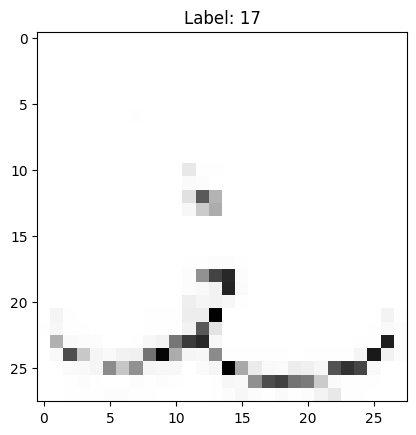

In [38]:
plt.imshow(cv2.cvtColor(train_images[1959], cv2.COLOR_BGR2GRAY) if len(train_images[0].shape) == 3 else train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[1959]}")
plt.show()

In [58]:
#Normalize / Standardize:
train_images=train_images/255.0
test_images=test_images/255.0

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer, Reshape

In [57]:
train_images.shape

(42559, 28, 28, 3)

In [63]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 3)))  # Renkli resimler için 3 kanal
model.add(Reshape(target_shape=(28, 28, 3)))  # Resmi yeniden şekillendirme
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics='accuracy'
)

In [64]:
# Model özetini görüntüle
model.summary()

# Modeli eğit
history = model.fit(train_images, train_labels, validation_split=0.10, epochs=10, verbose=1)

# Modeli değerlendir
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 28, 28, 3)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 12)        336       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 12)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2028)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                20290     
                                                                 
Total params: 20626 (80.57 KB)
Trainable params: 20626 (80.57 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

OverflowError: cannot convert float infinity to integer

In [61]:
# Eğitim sürecini görselleştirme
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıplarını çizme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Modeli test veri seti üzerinde değerlendirme
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py", line 118, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer 'reshape_6' (type Reshape).
    
    total size of new array must be unchanged, input_shape = [28, 28, 3], output_shape = [28, 28, 1]
    
    Call arguments received by layer 'reshape_6' (type Reshape):
      • inputs=tf.Tensor(shape=(None, 28, 28, 3), dtype=float32)
